In [2]:
#SOURCE LINK:https://opendata.socrata.com/Business/Hospital-Compare-Scores-Ratings/vjsj-36qd

# This data provides Scores and Rankings for the following hospital functional areas:
# 1) Structural (High = Good)
# 2) Complications (Low = Good)
# 3) Consumer Satisfaction (Low = Good)
# 4) Heart attack and pneumonia payments (Low = Good)
# 5) Readmission & death (Low = Good)
# 6) Timeliness (Low = Good)
# 7) Infection rates (Low = Good)
# 8) Imaging quality (Low = Good)
# 8) Star ratings (High = Good)
# For example, a Ranking of 2/20 is better than 20/20 and a Score of 2.1 / 3 is better than 2.5 / 3.
# These data points are computed by the proprietary algorithm, BayeSniffer.com and the data was obtained from Medicare.com

import pandas as pd
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import json
import numpy as np

url = "https://opendata.socrata.com/resource/vjsj-36qd.json?$limit=50000"
response = requests.get(url).json()

In [4]:
provider_id = []
hosname = []
zipcode = []
score = []
scoreraw = []
score_size = []
rank = []
rank_size = []
rankraw = []
function = []
city = []
state = []
for dic in range(len(response)):
    try:
        provider_id.append(response[dic]["provider_id"])
    except KeyError:
        provider_id.append("")
        
    try:
        hosname.append(response[dic]["hospital_name"]) 
    except KeyError:
        hosname.append("")
    
    try:
        zipcode.append(response[dic]["zip_code"]) 
    except KeyError:
        zipcode.append("")
    
    try:
        scoreraw = response[dic]["score"]
        scoreraw = scoreraw.split("\t/\t")
        score.append(scoreraw[0])
        score_size.append(scoreraw[1])
    except KeyError:
        score.append("")
        rank_size.append("")
    try:
        rankraw = response[dic]["rank"] 
        rankraw = rankraw.split("\t/\t")
        rank.append(rankraw[0])
        rank_size.append(rankraw[1])
    except KeyError:
        rank.append("")
        rank_size.append("")
        
    try:
        function.append(response[dic]["function"]) 
    except:
        function.append("")
        
    try:
        address = response[dic]["location"]["human_address"]
        address = json.loads(address)
        city.append(address["city"])
        state.append(address["state"])
    except KeyError:    
        city.append("")
        state.append("")

## 

In [5]:
df = pd.DataFrame({"Provider ID": provider_id, "Hospital Name": hosname, "Zipcode": zipcode, "Score": score, "Score Range": score_size, "Rank": rank, "Rank Range": rank_size, "Function": function, "City": city, "State": state})
df.head()
# Backup response
# f= open("API RESPONSE BACKUP.txt","w+")
# f.write(str(response))

,Provider ID,Hospital Name,Zipcode,Score,Score Range,Rank,Rank Range,Function,City,State
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,36301,2.2,3,18,27,Infections,DOTHAN,AL
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,36301,2.0,3,31,57,Readmission & Death,DOTHAN,AL
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,36301,2.0,3,5,10,Payments,DOTHAN,AL
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,36301,2.3,3,14,22,Imaging,DOTHAN,AL
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,36301,1.9,3,8,34,Consumer Satisfaction,DOTHAN,AL


In [7]:
df["Score"] = df["Score"].astype(float)
df["Score Range"] = df["Score Range"].astype(int)
df["Score Percentile"] = df["Score"] / df["Score Range"]

df["Rank"] = df["Rank"].astype(int)
df["Rank Range"] = df["Rank Range"].astype(int)
df["Rank Percentile"] = df["Rank"] / df["Rank Range"]
ca = df.loc[df["State"] == "CA"]
#md = df.loc[df["State"] == "MD"]
md = df.loc[df["State"] == "MS"]
ny = df.loc[df["State"] == "NY"]
df = df.loc[df["State"] != ""]
df.to_csv("API Exported Data.csv", index=False)

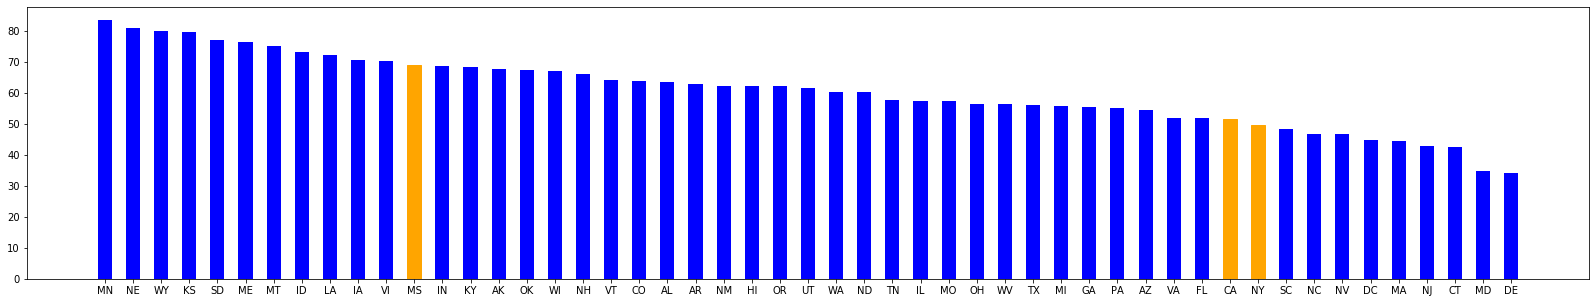

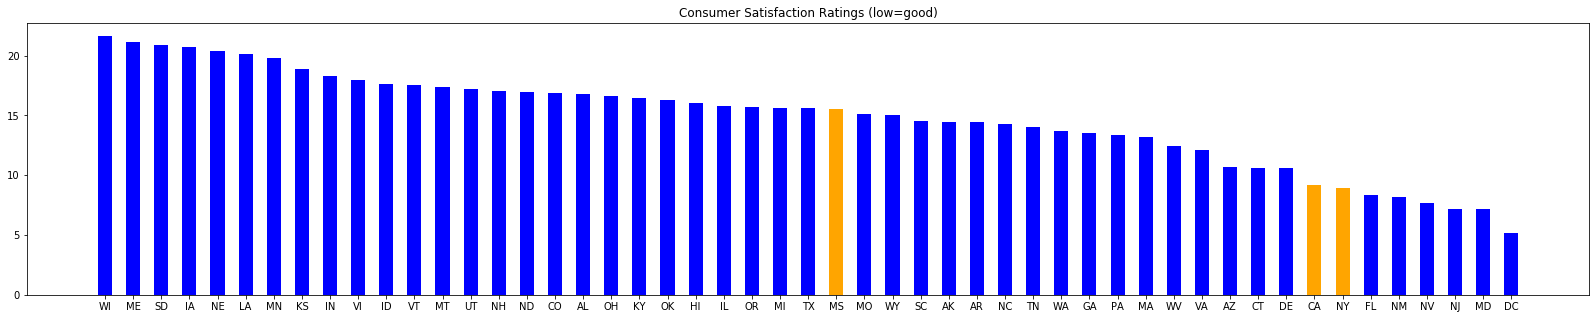

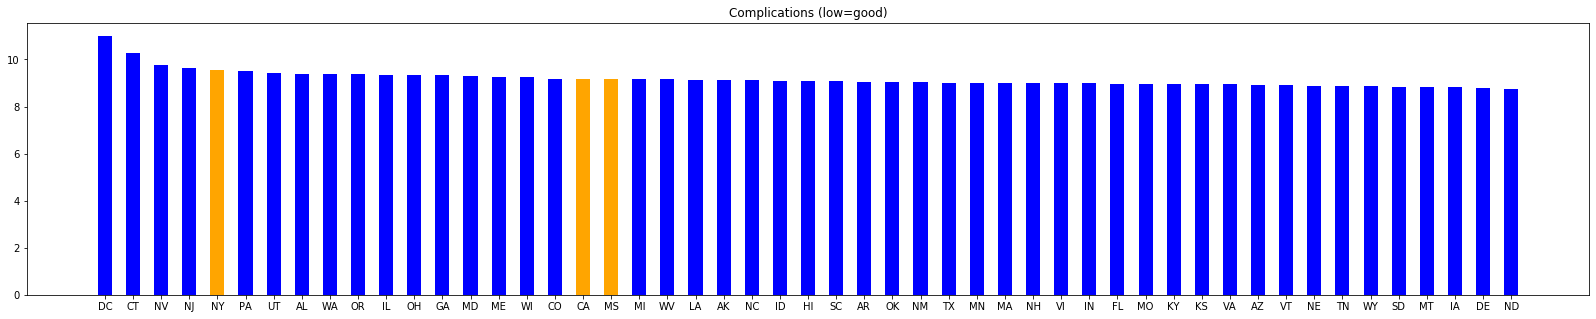

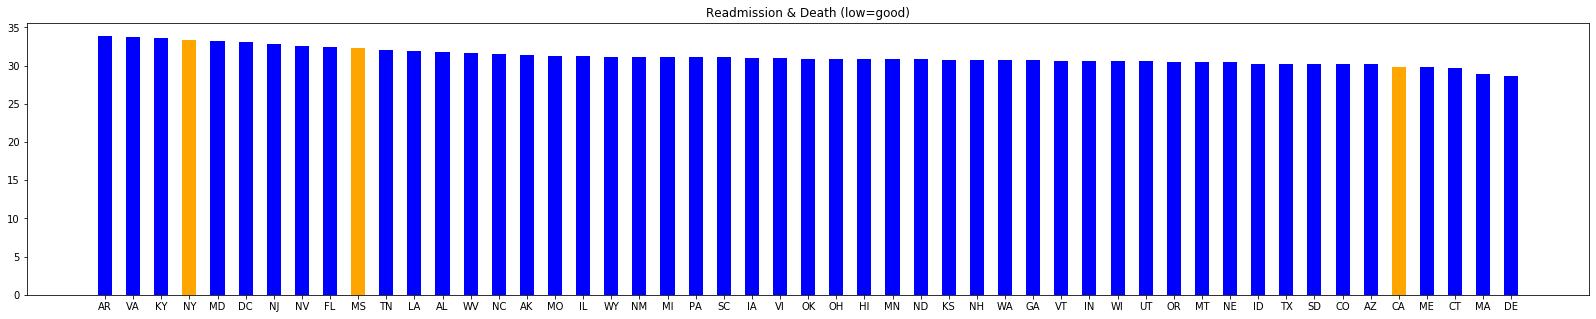

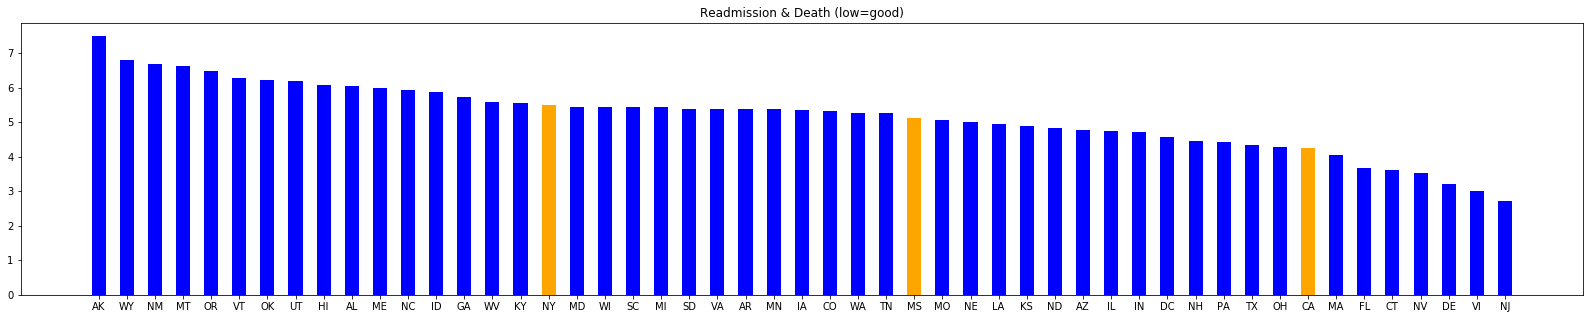

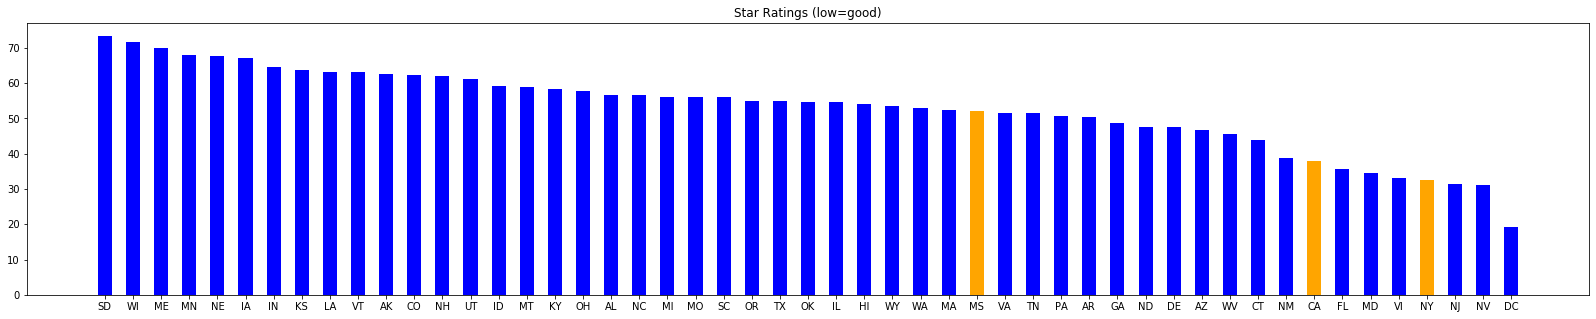

In [8]:
# plt.figure(figsize=(28,5))
# df_groupby = df.loc[df["Function"] == "Timeliness"]
# df_groupby = df.groupby("State").agg({"Score": "mean", "Rank": "mean", "State": "first"})
# df_groupby['Mask'] = ((df_groupby['State'] == 'CA') | (df_groupby['State'] == 'MS') | (df_groupby['State']  == 'NY'))
# df_groupby.sort_values(by=["Rank"], ascending=False, inplace=True)
# #plt.xticks(rotation='vertical')
# bargraph = plt.bar(df_groupby["State"], df_groupby["Rank"], width=0.5, color = df_groupby['Mask'].map({True:'orange',False:'b'}))
# bargraph[11].set_color("orange")
# bargraph[41].set_color("orange")
# bargraph[40].set_color("orange")


# plt.figure(figsize=(28,5))
# df_groupby = df.loc[df["Function"] == "Consumer Satisfaction"]
# df_groupby = df_groupby.groupby("State").agg({"Score": "mean", "Rank": "mean"})
# df_groupby["State"] = df_groupby.index
# df_groupby.sort_values(by=["Rank"], ascending=False, inplace=True)
# df_groupby['Mask'] = ((df_groupby['State'] == 'CA') | (df_groupby['State'] == 'MS') | (df_groupby['State']  == 'NY'))
# #plt.xticks(rotation='vertical')
# bargraph = plt.bar(df_groupby["State"], df_groupby["Rank"], width=0.5, color = df_groupby['Mask'].map({True:'orange',False:'b'}))
# #bargraph.set_color("orange")
# #bargraph[41].set_color("orange")
# #bargraph[40].set_color("orange")
# plt.title("Consumer Satisfaction Ratings (low=good)")
# plt.savefig("chart.png")


# plt.figure(figsize=(28,5))
# df_groupby = df.loc[df["Function"] == "Complications"]
# df_groupby = df_groupby.groupby("State").agg({"Score": "mean", "Rank": "mean"})
# df_groupby["State"] = df_groupby.index
# df_groupby.sort_values(by=["Rank"], ascending=False, inplace=True)
# df_groupby['Mask'] = ((df_groupby['State'] == 'CA') | (df_groupby['State'] == 'MS') | (df_groupby['State']  == 'NY'))
# #plt.xticks(rotation='vertical')
# bargraph = plt.bar(df_groupby["State"], df_groupby["Rank"], width=0.5, color = df_groupby['Mask'].map({True:'orange',False:'b'}))
# #bargraph.set_color("orange")
# #bargraph[41].set_color("orange")
# #bargraph[40].set_color("orange")
# plt.title("Complications (low=good)")
# plt.savefig("Complications.png")

# plt.figure(figsize=(28,5))
# df_groupby = df.loc[df["Function"] == "Readmission & Death"]
# df_groupby = df_groupby.groupby("State").agg({"Score": "mean", "Rank": "mean"})
# df_groupby["State"] = df_groupby.index
# df_groupby.sort_values(by=["Rank"], ascending=False, inplace=True)
# df_groupby['Mask'] = ((df_groupby['State'] == 'CA') | (df_groupby['State'] == 'MS') | (df_groupby['State']  == 'NY'))
# #plt.xticks(rotation='vertical')
# bargraph = plt.bar(df_groupby["State"], df_groupby["Rank"], width=0.5, color = df_groupby['Mask'].map({True:'orange',False:'b'}))
# #bargraph.set_color("orange")
# #bargraph[41].set_color("orange")
# #bargraph[40].set_color("orange")
# plt.title("Readmission & Death (low=good)")
# plt.savefig("Radmission & Death.png")

# plt.figure(figsize=(28,5))
# df_groupby = df.loc[df["Function"] == "Payments"]
# df_groupby = df_groupby.groupby("State").agg({"Score": "mean", "Rank": "mean"})
# df_groupby["State"] = df_groupby.index
# df_groupby.sort_values(by=["Rank"], ascending=False, inplace=True)
# df_groupby['Mask'] = ((df_groupby['State'] == 'CA') | (df_groupby['State'] == 'MS') | (df_groupby['State']  == 'NY'))
# #plt.xticks(rotation='vertical')
# bargraph = plt.bar(df_groupby["State"], df_groupby["Rank"], width=0.5, color = df_groupby['Mask'].map({True:'orange',False:'b'}))
# #bargraph.set_color("orange")
# #bargraph[41].set_color("orange")
# #bargraph[40].set_color("orange")
# plt.title("Readmission & Death (low=good)")
# plt.savefig("Payments.png")

# plt.figure(figsize=(28,5))
# df_groupby = df.loc[df["Function"] == "Star Ratings"]
# df_groupby = df_groupby.groupby("State").agg({"Score": "mean", "Rank": "mean"})
# df_groupby["State"] = df_groupby.index
# df_groupby.sort_values(by=["Rank"], ascending=False, inplace=True)
# df_groupby['Mask'] = ((df_groupby['State'] == 'CA') | (df_groupby['State'] == 'MS') | (df_groupby['State']  == 'NY'))
# #plt.xticks(rotation='vertical')
# bargraph = plt.bar(df_groupby["State"], df_groupby["Rank"], width=0.5, color = df_groupby['Mask'].map({True:'orange',False:'b'}))
# #bargraph.set_color("orange")
# #bargraph[41].set_color("orange")
# #bargraph[40].set_color("orange")
# plt.title("Star Ratings (low=good)")
# plt.savefig("Star Rating.png")